In [3]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [10]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]], dtype=int64)

* 정확도

In [11]:
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [14]:
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [15]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [17]:
import numpy as np
from sklearn.preprocessing import Binarizer
y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [20]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print(confusion_matrix(y, y_pred2))
print(accuracy_score(y, y_pred2))
print(precision_score(y, y_pred2))
print(recall_score(y, y_pred2))
print(f1_score(y, y_pred2))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [28]:
from sklearn.metrics import roc_curve

probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:,1])


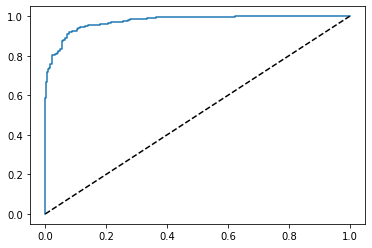

In [31]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label="ROC")
plt.plot([0, 1], [0, 1], 'k--', label='Random')

* ROC AUC 값

In [32]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y, y_pred))

0.9012340785370753
